# Pymaceuticals Inc.
---

### Analysis

We can correlate the heavier the mouse the more volume the tumor has while on the Capolmulin treatment.
We see that Capolumin and Ramicane treatments show more effectiveness in reducing the size of tumors than 
	Infubinol and Ceftamin in the boxplot.
We also see on average only Capolumin and Ramicane reduced the starting size of the tumor (45 mm3) in the summary statistics.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
unique_mice_count = combined_data['Mouse ID'].nunique()
print(f"Number of unique mice IDs: {unique_mice_count}")

Number of unique mice IDs: 249


In [52]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
duplicate_count = combined_data.duplicated(subset=['Mouse ID', 'Timepoint']).sum()
print(f"Number of duplicates: {duplicate_count}")

Number of duplicates: 5


In [84]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
duplicate_count = cleaned_data.duplicated(subset=['Mouse ID', 'Timepoint']).sum()
print(f"Number of duplicates: {duplicate_count}")

Number of duplicates: 0


In [9]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count_cleaned = cleaned_data['Mouse ID'].nunique()
print(f"Number of unique mice in the cleaned DataFrame: {unique_mice_count_cleaned}")

Number of unique mice in the cleaned DataFrame: 249


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
# Initialize an empty DataFrame to hold the summary statistics
summary_list = []

# List of drug regimens
drug_regimens = cleaned_data['Drug Regimen'].unique()

# Loop through each drug regimen to calculate the statistics
for regimen in drug_regimens:
    regimen_data = cleaned_data[cleaned_data['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # Calculate statistics
    mean_volume = regimen_data.mean()
    median_volume = regimen_data.median()
    variance_volume = regimen_data.var()
    std_dev_volume = regimen_data.std()
    sem_volume = std_dev_volume / (len(regimen_data) ** 0.5)  # Standard error of the mean
    
    # Append the results to the summary DataFrame, including the regimen name
    summary_list.append({
        'Drug Regimen': regimen,
        'Mean Tumor Volume': mean_volume,
        'Median Tumor Volume': median_volume,
        'Tumor Volume Variance': variance_volume,
        'Tumor Volume Std. Dev.': std_dev_volume,
        'Tumor Volume Std. Err.': sem_volume
    })

# Convert the list of dictionaries into a DataFrame
summary_stats = pd.DataFrame(summary_list)

# Set the index to the drug regimen
summary_stats.set_index('Drug Regimen', inplace=True)

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stat = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem=lambda x: x.std() / (len(x) ** 0.5)  # Standard error of the mean
).reset_index()

# Set the index to the drug regimen
summary_stat.set_index('Drug Regimen', inplace=True)
summary_stat

,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

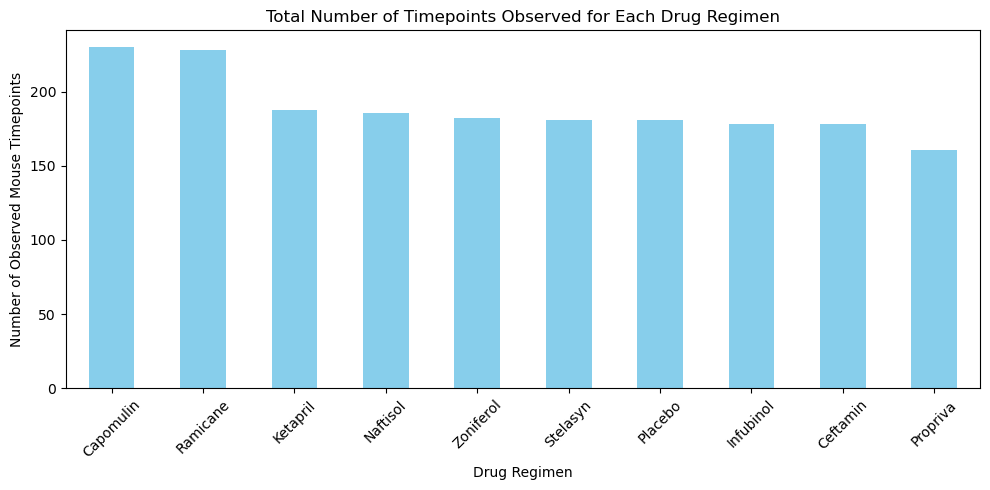

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group by 'Drug Regimen' and count the number of rows for each regimen
drug_regimen_counts = combined_data['Drug Regimen'].value_counts()

# Generate the bar plot
drug_regimen_counts.plot(kind='bar', figsize=(10, 5), color='skyblue', rot=45)

# Add titles and labels
plt.title('Total Number of Timepoints Observed for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

# Show the plot
plt.tight_layout()
plt.show()

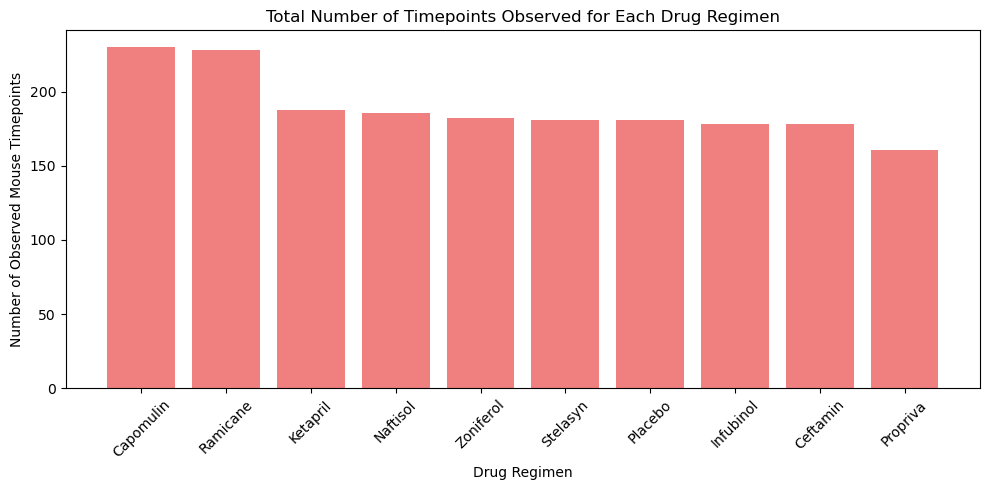

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group by 'Drug Regimen' and count the number of rows for each regimen
drug_regimen_counts = combined_data['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 5))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='lightcoral')

# Add titles and labels
plt.title('Total Number of Timepoints Observed for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

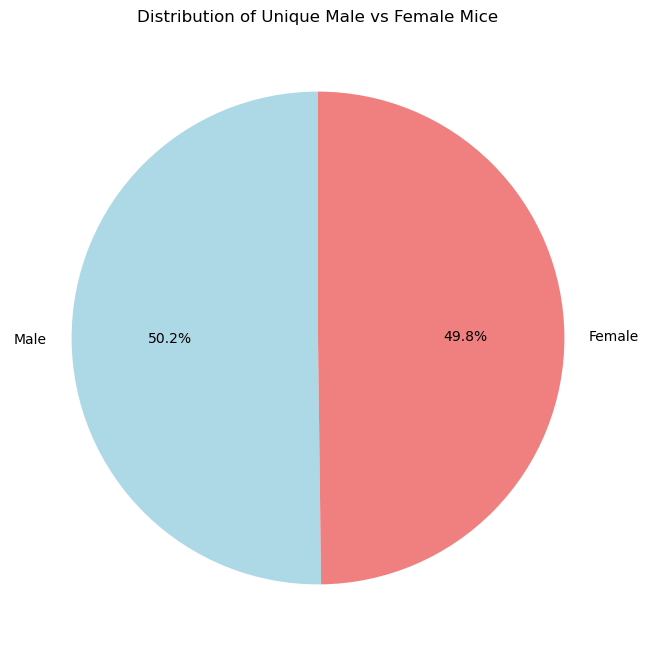

In [16]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = combined_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique mice by gender
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart using Pandas
gender_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Add title
plt.title('Distribution of Unique Male vs Female Mice')

# Show the plot
plt.ylabel('')  # Hide the y-label for better aesthetics
plt.show()


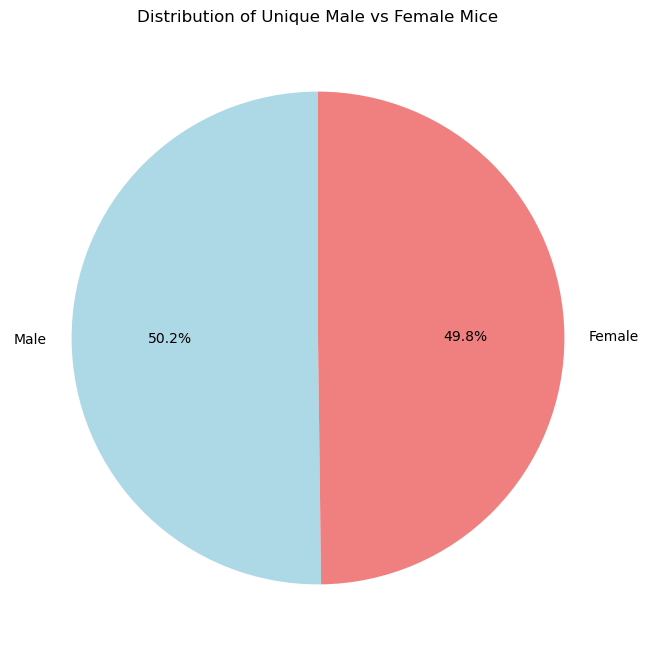

In [17]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = combined_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique mice by gender
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Add title
plt.title('Distribution of Unique Male vs Female Mice')

# Show the plot
plt.ylabel('')  # Hide the y-label for better aesthetics
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_df, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Filter for the desired treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df = merged_df[merged_df['Drug Regimen'].isin(treatment_regimens)]

# Display the final DataFrame with relevant columns
final_tumor_volume_df = final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Weight (g)', 'Timepoint']]
final_tumor_volume_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Weight (g),Timepoint
0,a203,Infubinol,67.973419,23,45
1,a251,Infubinol,65.525743,25,45
3,a275,Ceftamin,62.999356,28,45
6,a411,Ramicane,38.407618,22,45
7,a444,Ramicane,43.047543,25,45
...,...,...,...,...,...
239,y769,Ceftamin,68.594745,27,45
240,y793,Capomulin,31.896238,17,45
241,y865,Ceftamin,64.729837,26,45
245,z578,Ramicane,30.638696,16,45


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset
    tumor_vol_data.append(treatment_data)

    # Calculate the quartiles and IQR
    Q1 = treatment_data.quantile(0.25)
    Q3 = treatment_data.quantile(0.75)
    IQR = Q3 - Q1

    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print results
    print(f"{treatment} potential outliers: {outliers.values}")

Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.3213458]
Ceftamin potential outliers: []


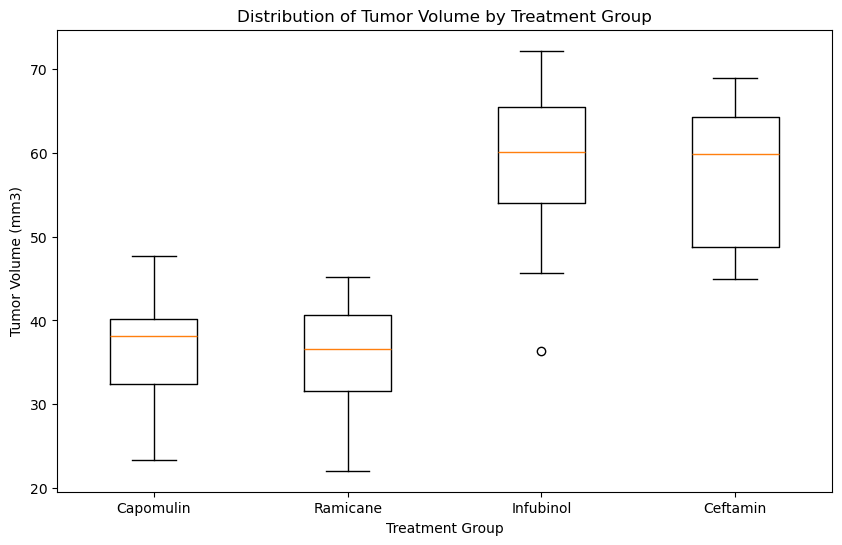

In [21]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Create a box plot for the tumor volume data
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments)

# Adding title and labels
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

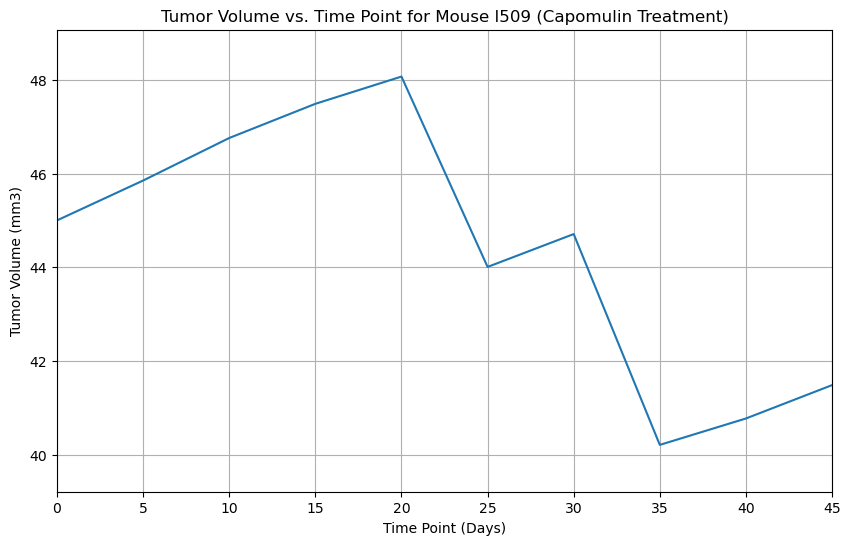

In [78]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the DataFrame for a single mouse treated with Capomulin
mouse_id = 'l509' # Replace with the ID of the mouse you want to plot
mouse_data = cleaned_data[cleaned_data['Mouse ID'] == mouse_id]

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Adding title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(mouse_data['Tumor Volume (mm3)'].min() -1 ,  mouse_data['Tumor Volume (mm3)'].max() +1)
plt.xlim(mouse_data['Timepoint'].min(), mouse_data['Timepoint'].max())

# Show the plot
plt.grid()
plt.show()

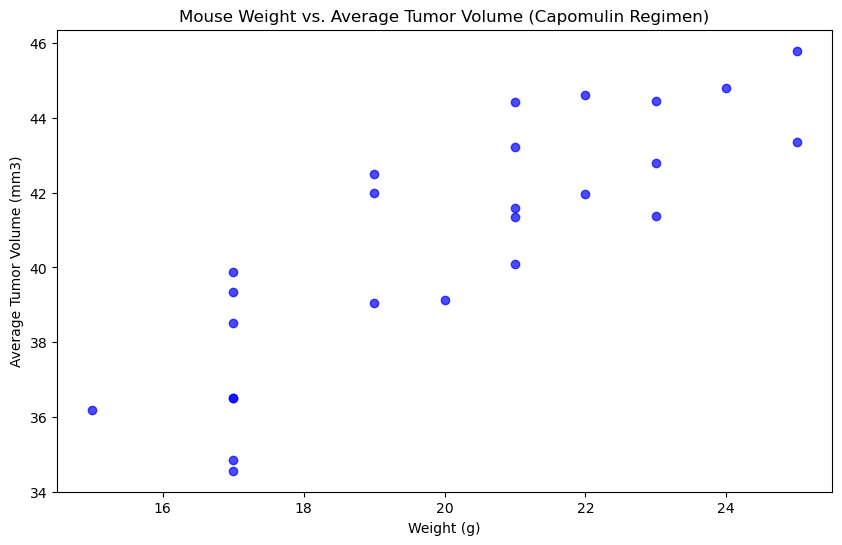

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the DataFrame for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color='blue', alpha=0.7)

# Adding title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


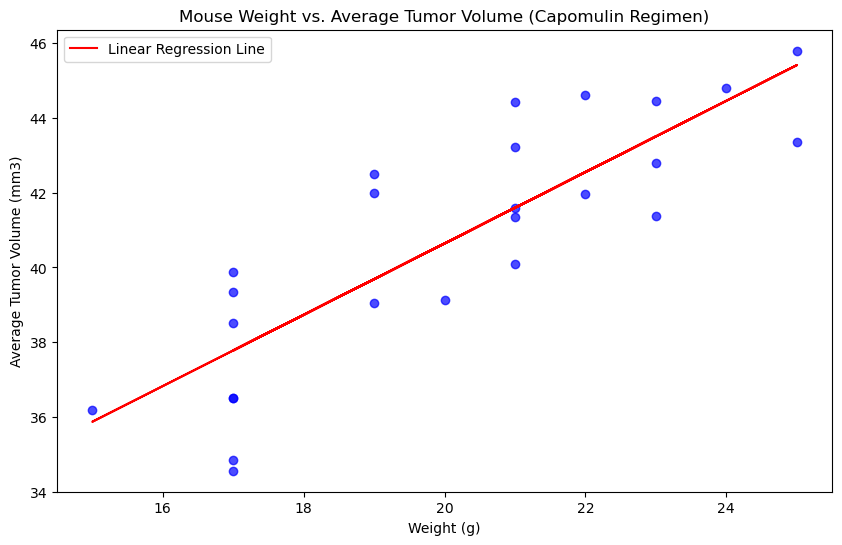

In [26]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = avg_tumor_volume['Weight (g)'].corr(avg_tumor_volume['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])

# Plotting the data and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color='blue', alpha=0.7)
plt.plot(avg_tumor_volume['Weight (g)'], intercept + slope * avg_tumor_volume['Weight (g)'], color='red', label='Linear Regression Line')

# Adding title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Show the plot
plt.show()